<a href="https://colab.research.google.com/github/IkostovI/python/blob/main/MNIST_Aufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow 
import numpy as np
import torchvision
import torch
import torchvision.transforms as transforms
from matplotlib import pyplot as plt # PLot the Data 
import torch.nn as nn

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('This Computation is running on {}'.format(device))

This Computation is running on cpu


In [3]:
train_set = torchvision.datasets.MNIST (     # Data Loader 
root = './data/MNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(  #Create a Batch from the data set
    train_set, batch_size = 20
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
torch.set_printoptions(linewidth=1200)

In [5]:
len(train_set) #How many Instances does the Data Set have? 

60000

In [6]:
train_set.train_labels #Labels of the Data Set

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
train_set.train_labels.bincount() #Nominal Distribution of Samples 

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [8]:
sample = next(iter(train_set)) # Get a single element from the data set 

In [9]:
len(sample)   # Each Element is a tuple, which contains two Elements - The image on first place and the Corresponding label

2

In [10]:
type(sample)

tuple

In [11]:
image, label = sample # Assign Variables to the Image and Label

label: 5


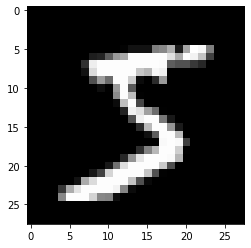

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [13]:
batch = next(iter(train_loader)) #Plot a batch of the data set
len(batch)

2

In [14]:
type(batch)

list

In [15]:
images,labels = batch

In [16]:
images.shape

torch.Size([20, 1, 28, 28])

In [17]:
labels.shape

torch.Size([20])

labels: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])


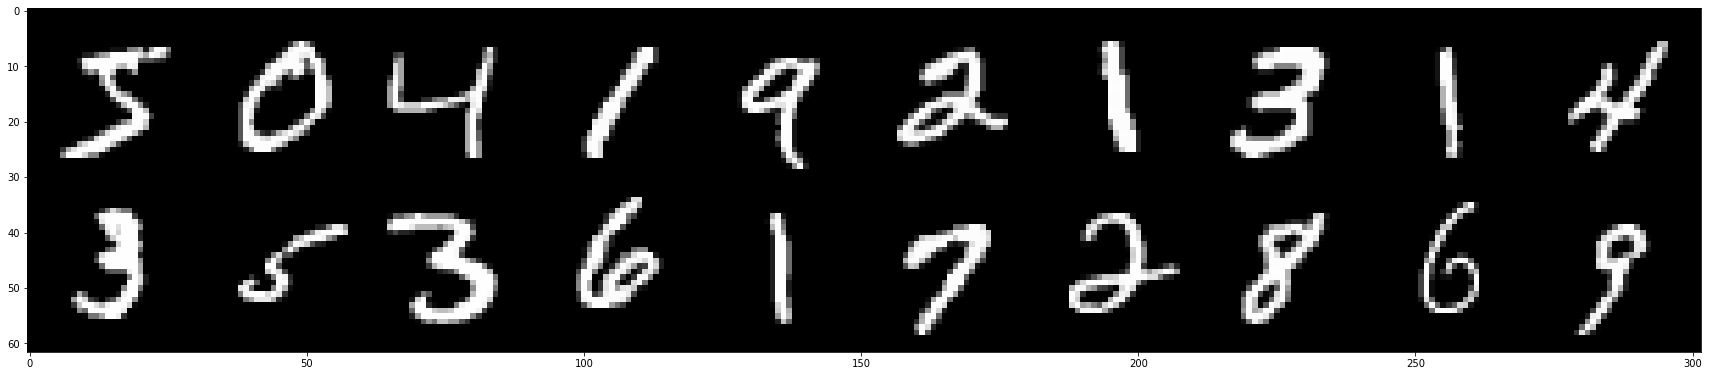

In [18]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(30,30))
plt.imshow(np.transpose(grid,(1,2,0)))
    
print('labels:',labels)

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv2_bn = nn.BatchNorm2d(16)

        self.fc1 = nn.Linear(16*5*5,200)
        self.fc2 = nn.Linear(200,150)
        self.fc3 = nn.Linear(150,10)
    
    def forward(self,x):
        x = self.pool1(self.conv1_bn(self.conv1(x)))
        x = self.pool1(self.conv2_bn(self.conv2(x)))
    
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x